 **Term Deposit Marketing**

Loading the dataset and the libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
data=pd.read_csv("term-deposit-marketing-2020.csv")
df=data


Analysis

In [80]:
print(data.shape)

(40000, 14)


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


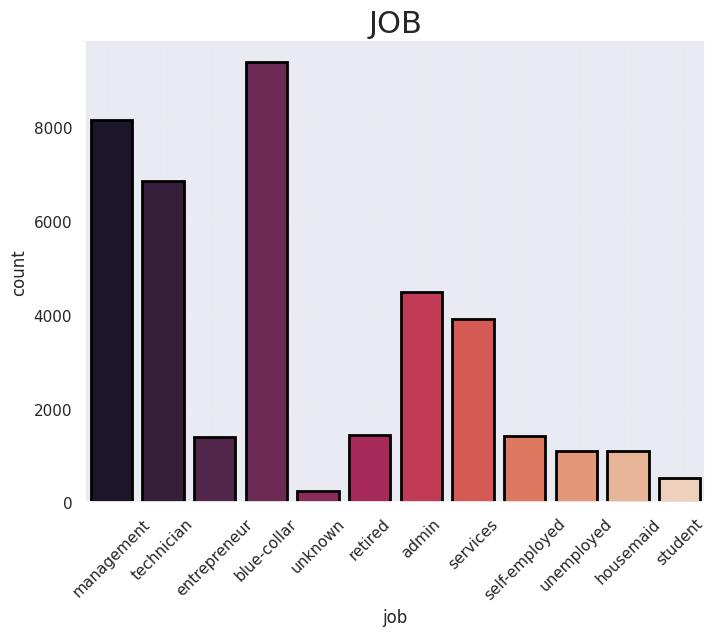

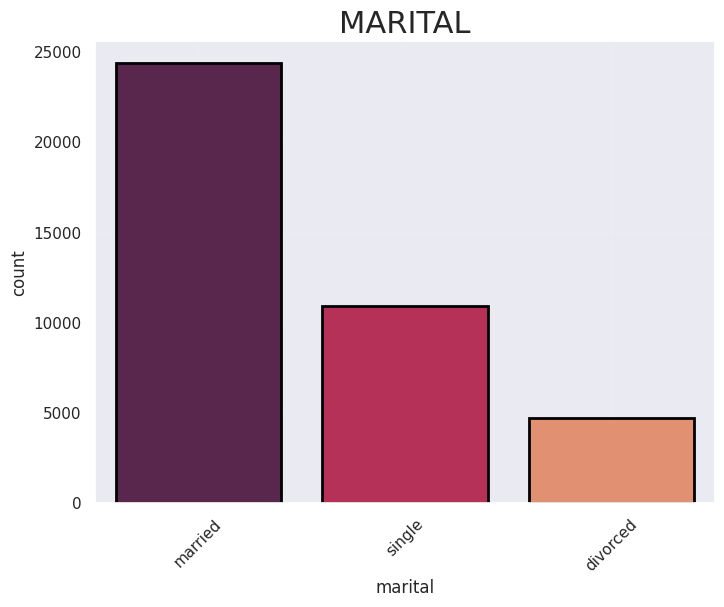

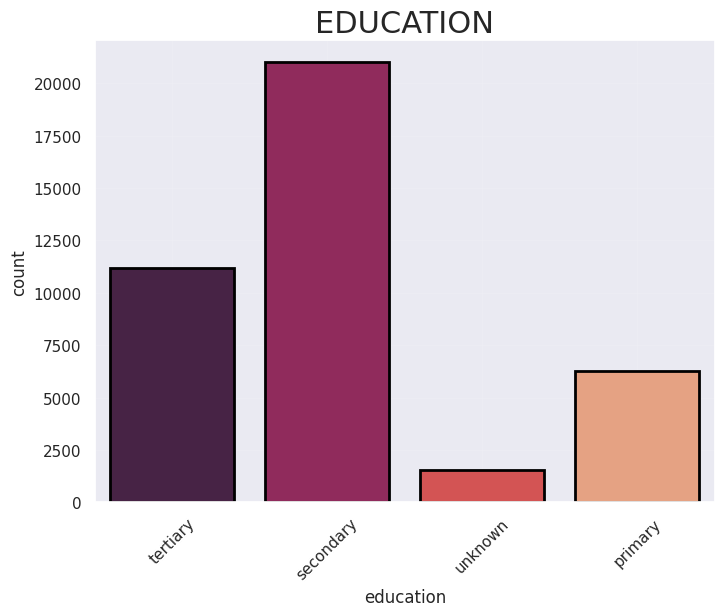

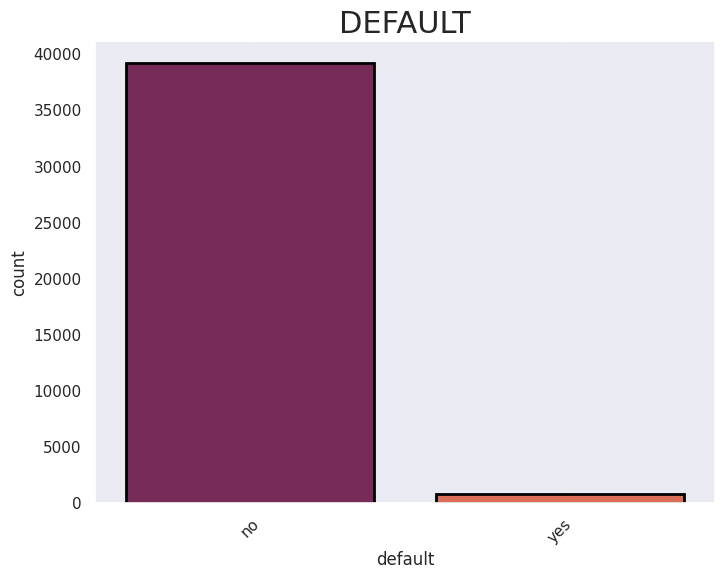

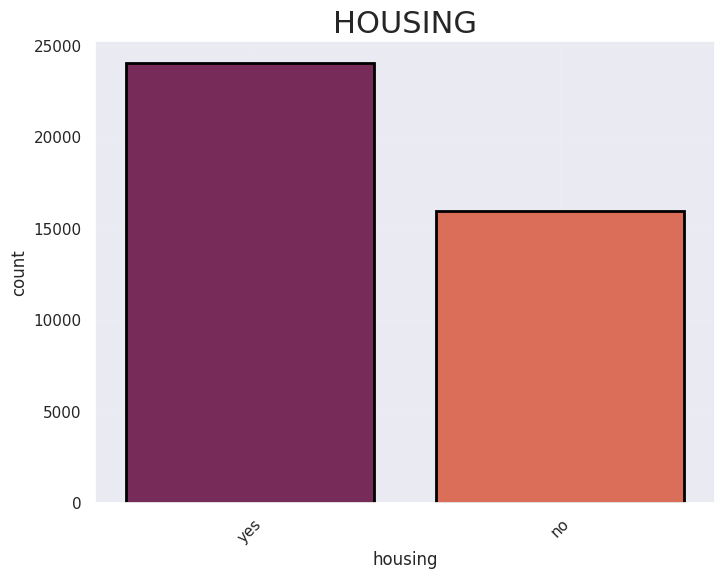

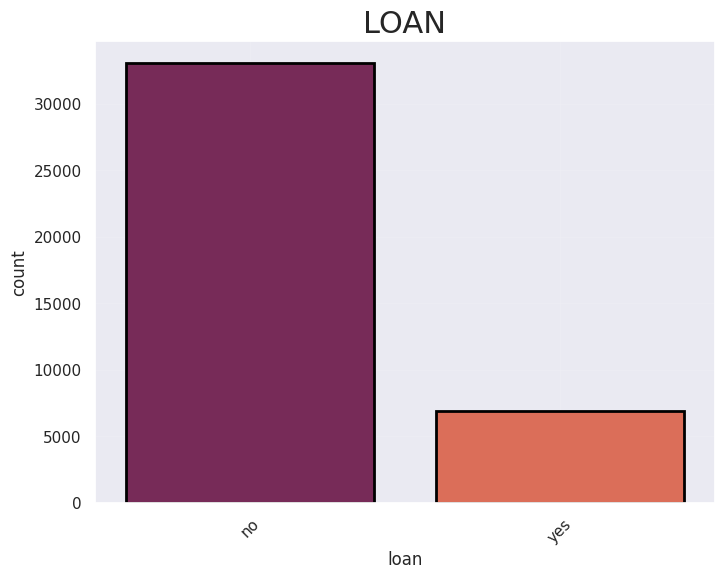

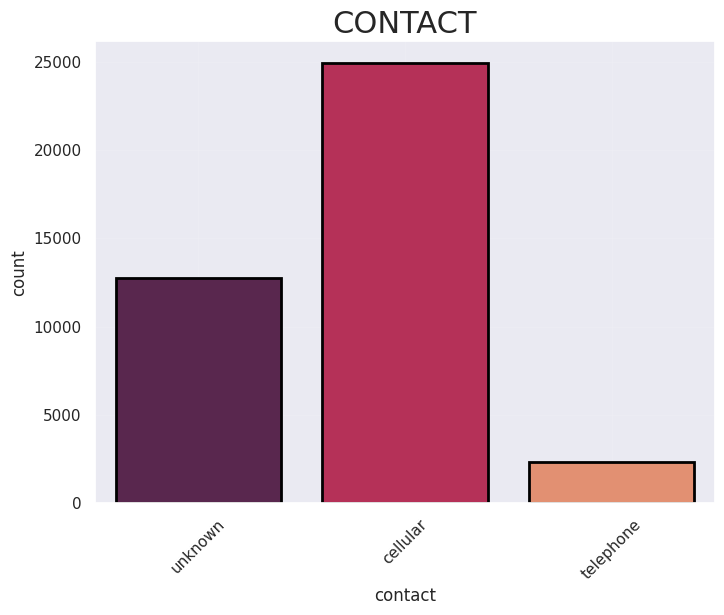

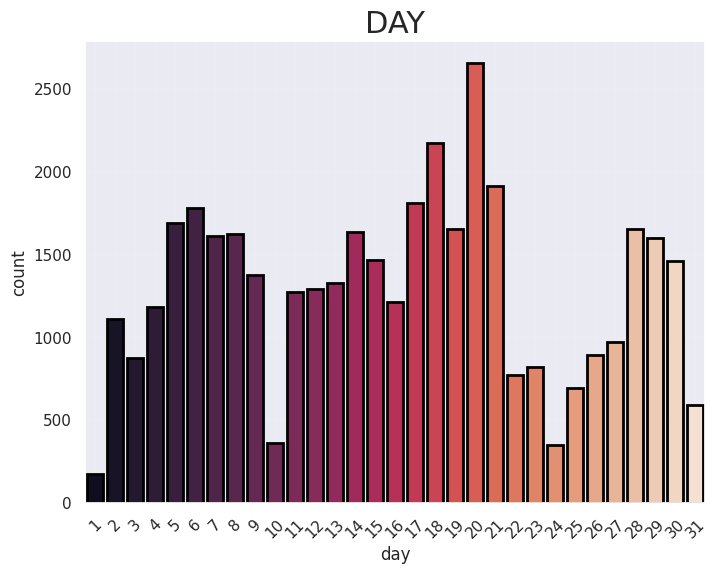

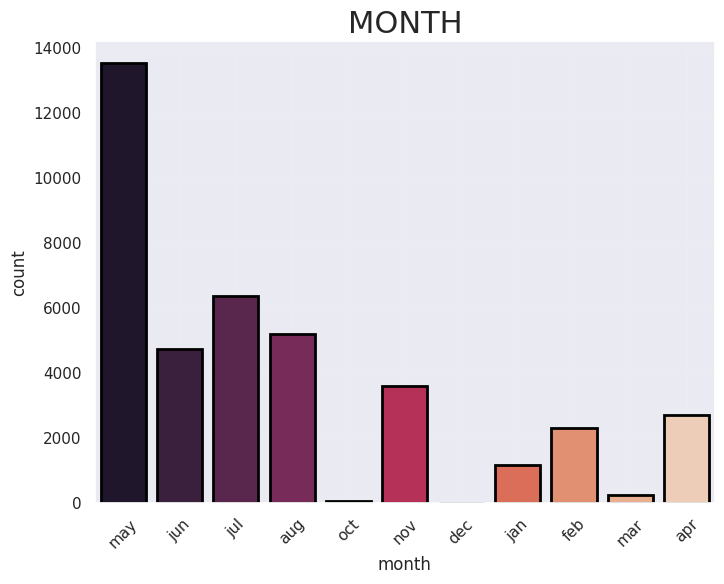

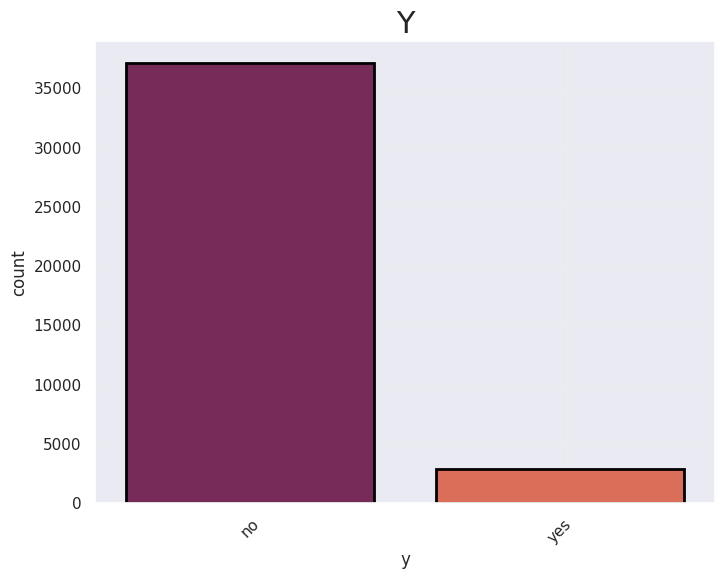

In [82]:
numerical_col = data[['age', 'balance', 'duration', 'campaign']]
for col in data.columns:
   if col not in numerical_col:
        sns.set(rc={'figure.figsize':(8,6)})
        sns.countplot(x=col, data=data,  palette='rocket', edgecolor='black', linewidth=2) 
        plt.title(col.upper(), fontsize = 22)
        plt.grid(alpha=0.1)
        plt.xticks(rotation=45)
        plt.show()

As we analyze the data we can observe that:


*   Most of the people have job as blue-collar and technician.
*   Most of them are married
*   Most of them have secondary education.
*   Most of them does not have default credit
*   Most of them have housing and Most of them does not have personal loans.
*  The communication of majority was through cellular and some means are unknown which can be any other social platform.
* The company contacted in the last half of the month. Majority between 15 and 20 of the month. Also the month with maximum calls are may, july and august.
* Also majority of the people did not subscibe hence makes the data unbalanced.





While comparing the features with the target value which is yes or no

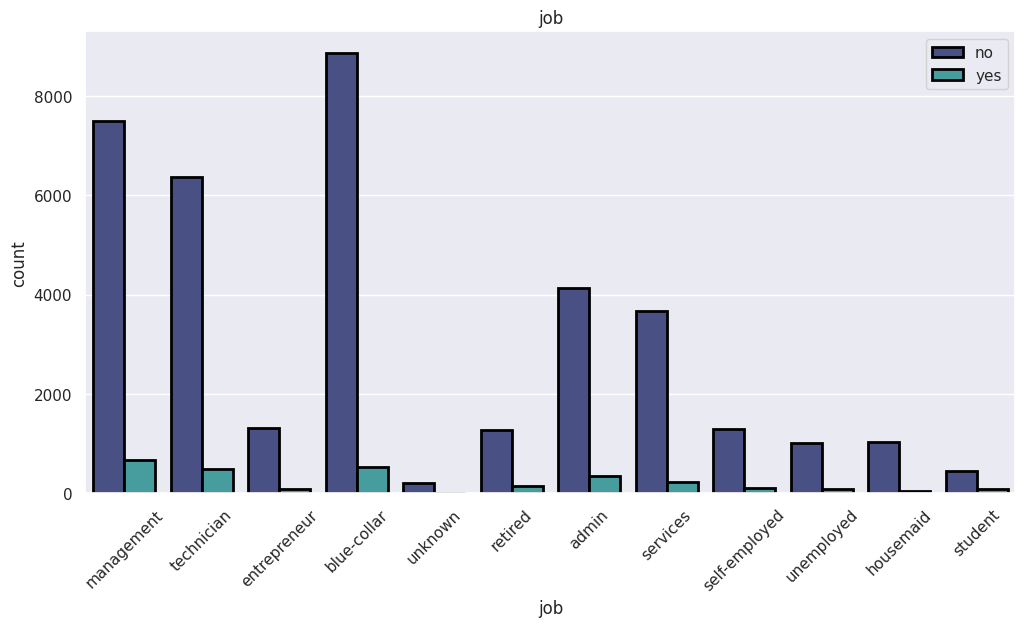

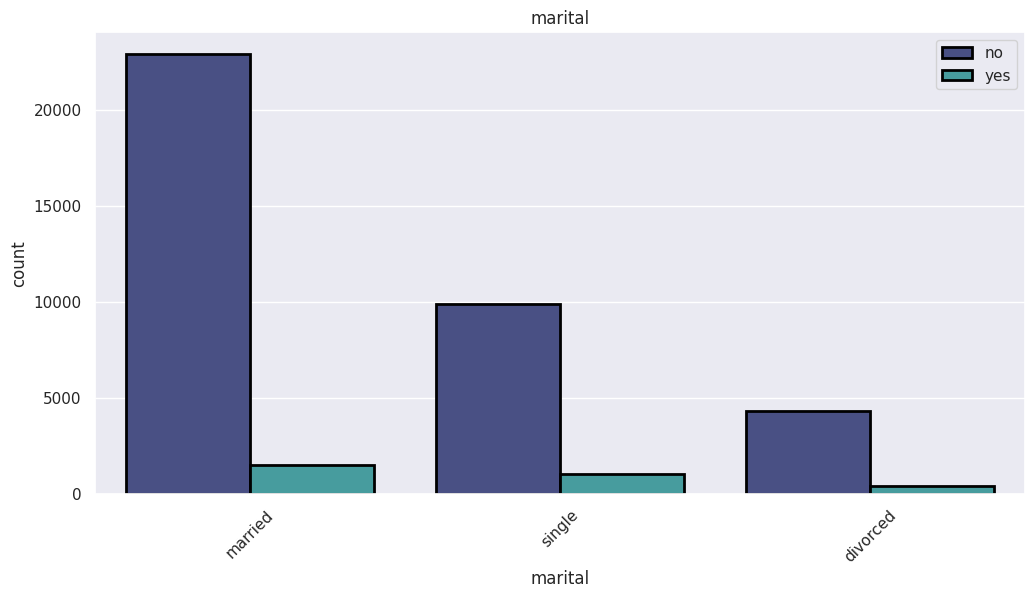

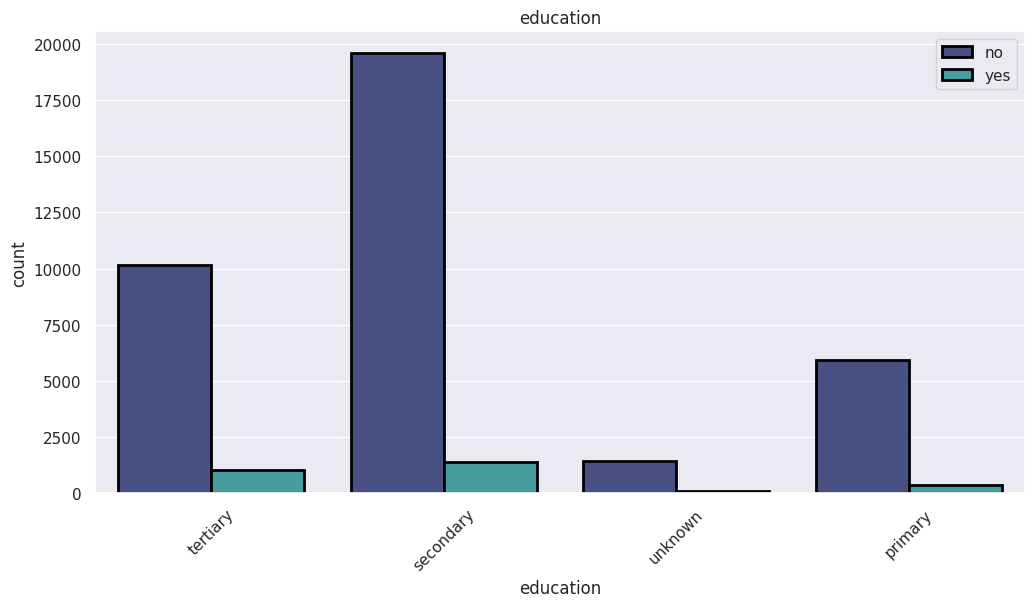

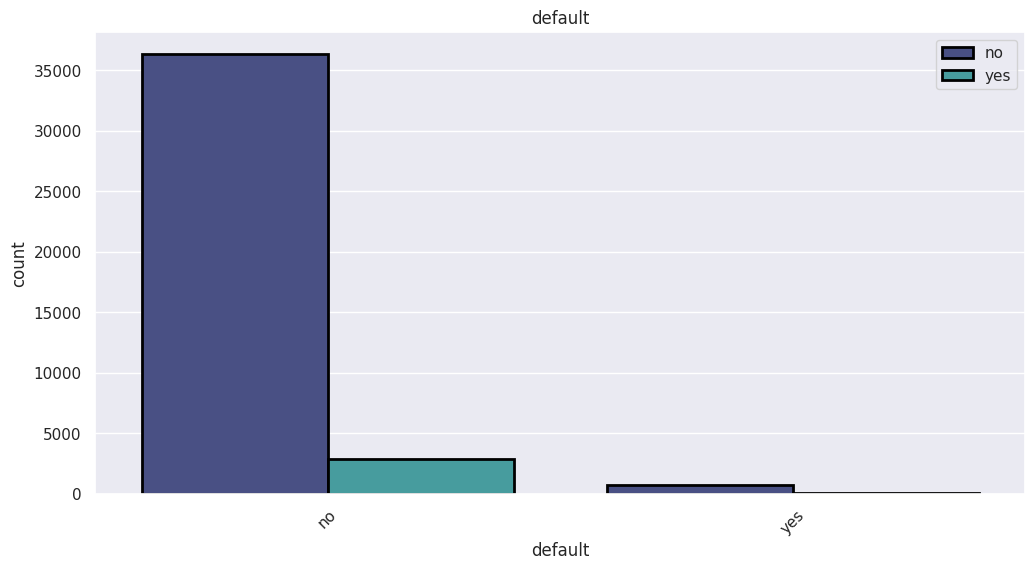

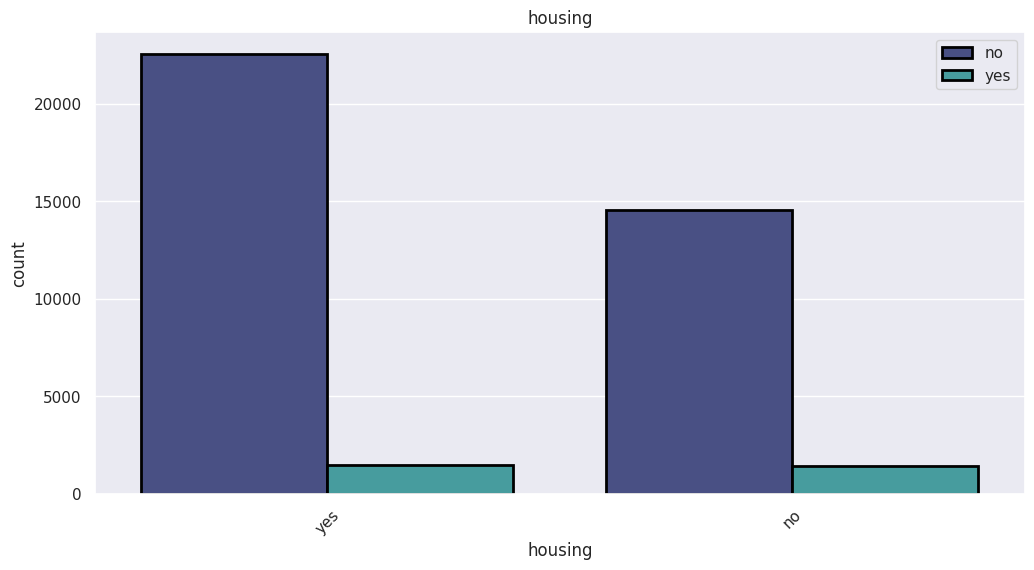

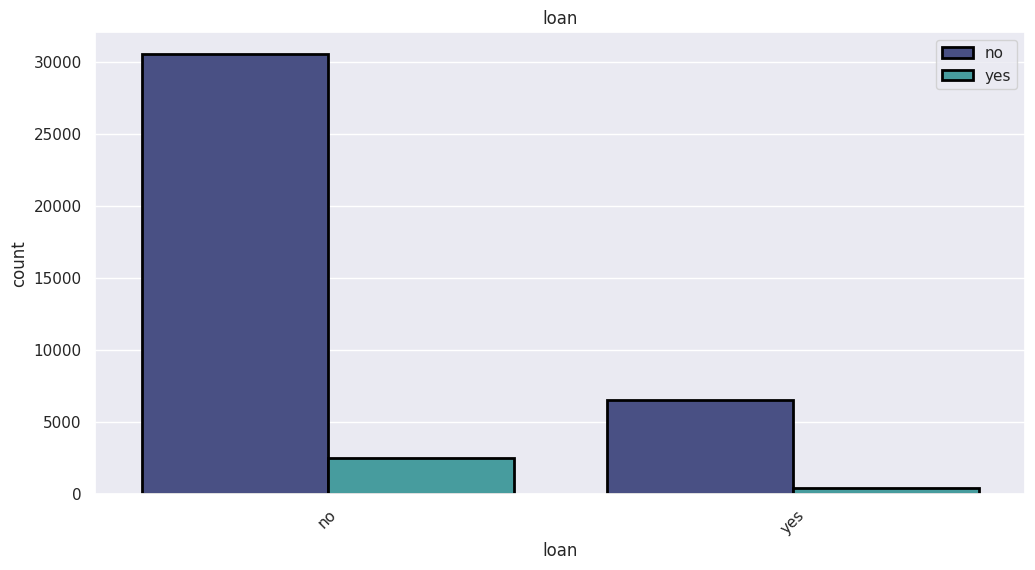

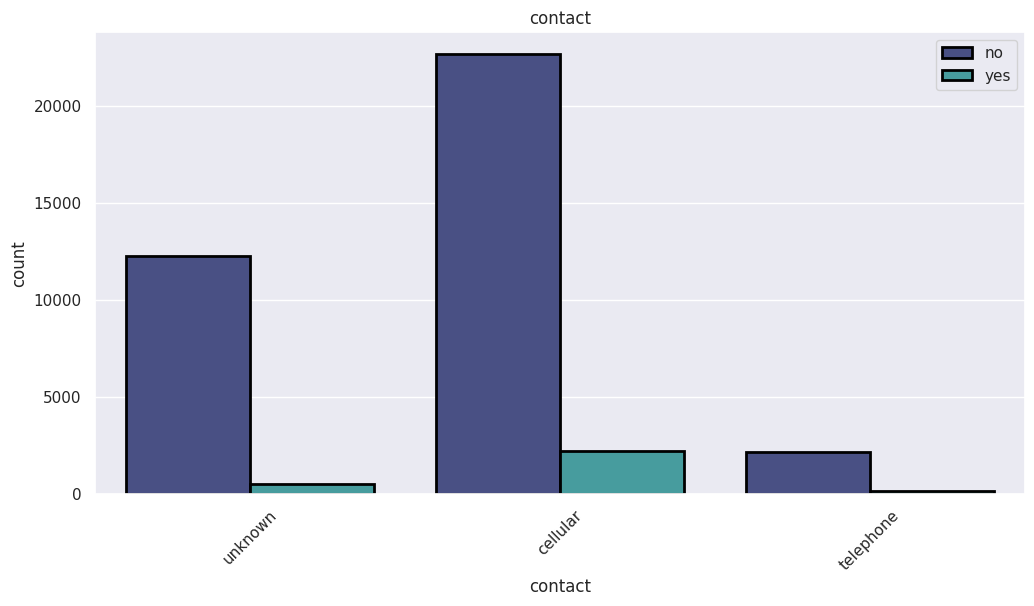

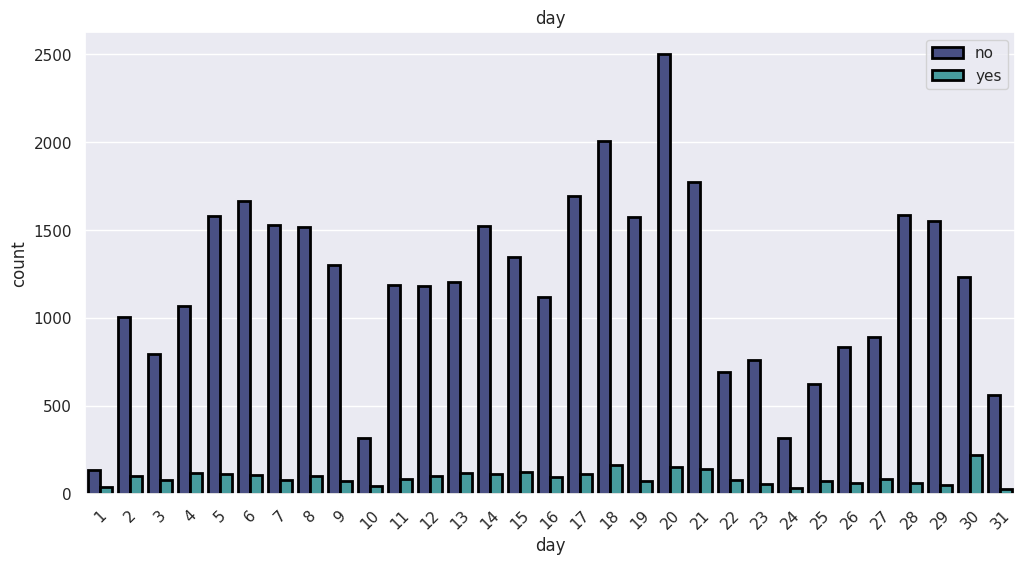

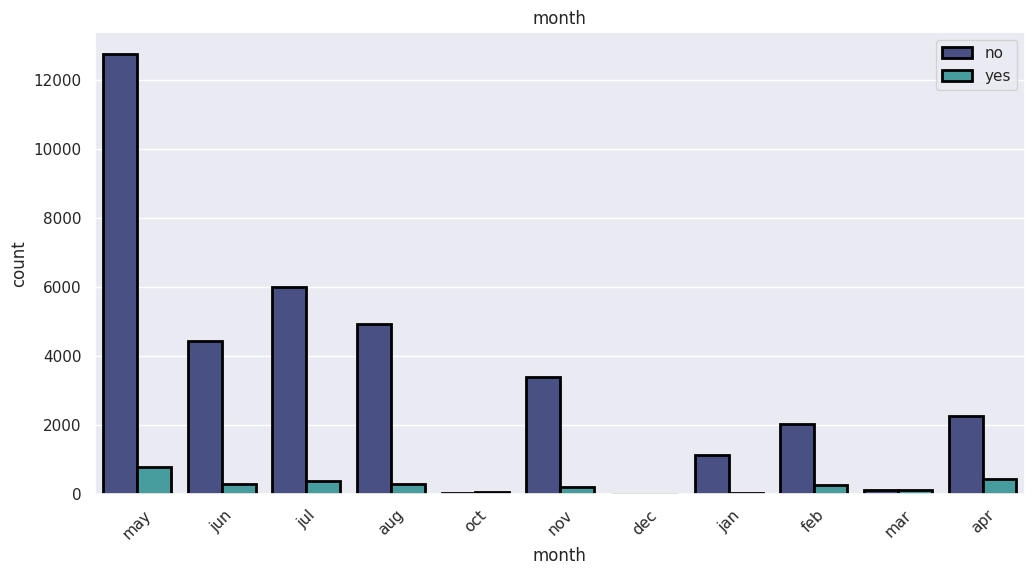

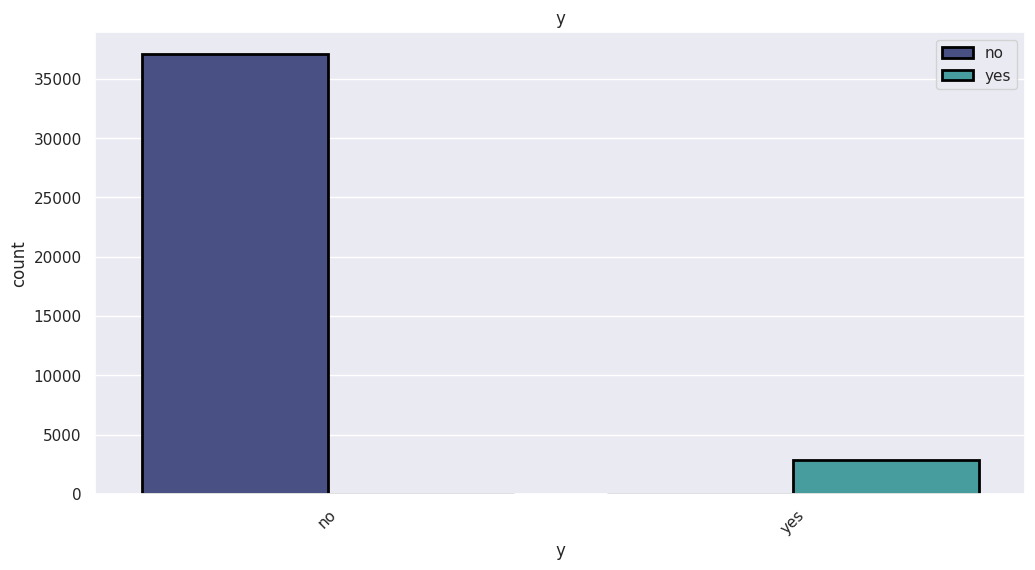

In [83]:
for column in data.columns: 
    if column not in numerical_col:
        sns.set(rc={'figure.figsize':(12,6)})
        ax = sns.countplot(data,x=data[column], hue=data.y, palette='mako', edgecolor='black', linewidth=2)
        plt.title(column)
        plt.xticks(rotation=45)
        plt.legend(loc = "upper right")
        plt.show()

Comparing we can observe that:
* Majority who works as blue collor and management is the subscriber and non-subscriber.
* The subscribers are mostly who are married but majority of them also are non-subscriber.
* Also Seconadry educated people tend to subscribe also not subscribe.
* Also thos who dont have credit are subscibers and none of the other group have subscribed.
*Those dont have loan have subscribed more.
*Also cellular is the means of communication where more subscribers have been made.
*Majority have subscribed in the moth of may 

In [84]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000




*   Average age is 40
*   Average balance is 1274 also there are outliers.
* Average duration is 254 seconds also there are outliers and the maximum time a person is contacted is 3 times to tell whether a person subscribes or not.



Finding outliers

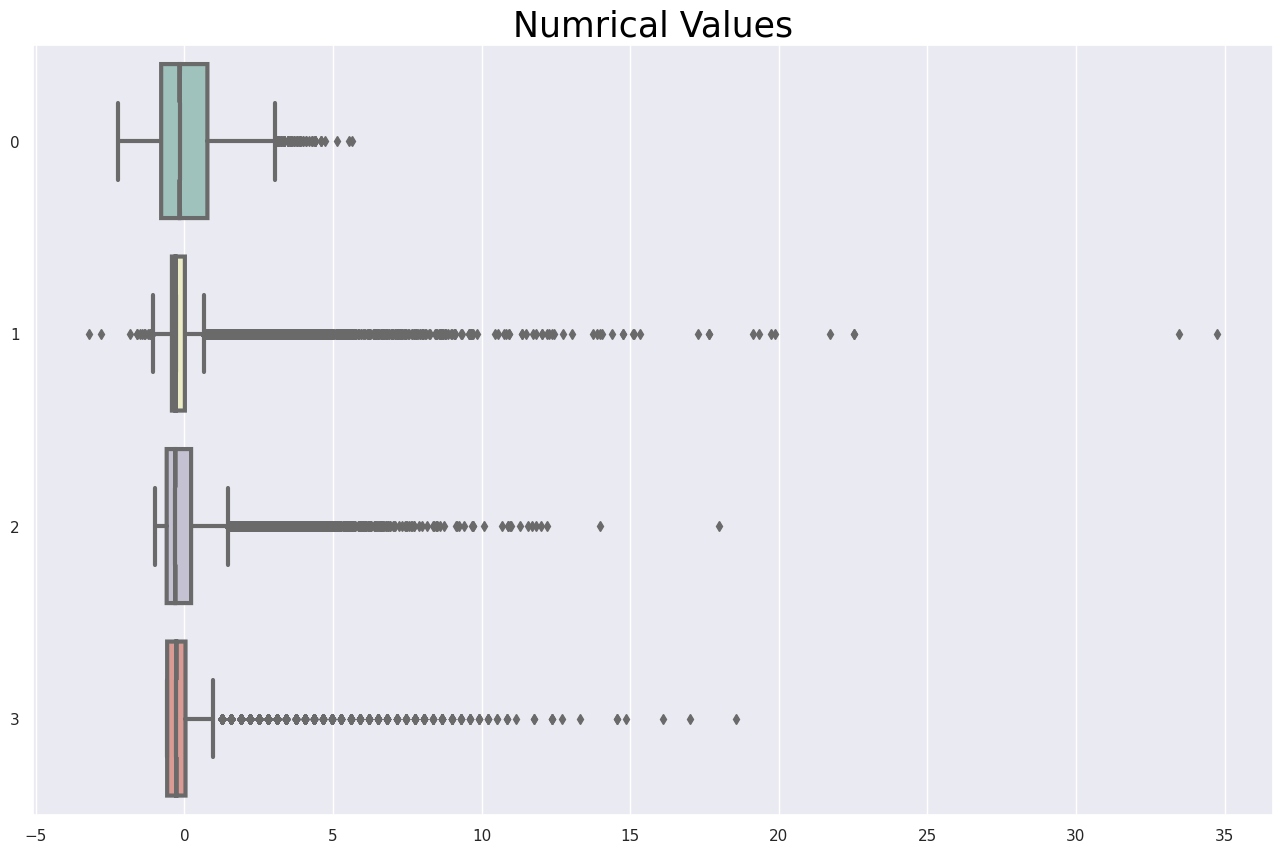

In [85]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer

numerical_col = ['age', 'balance', 'duration', 'campaign']
scaler= StandardScaler()
numerical_value=scaler.fit_transform(data[numerical_col])
fig,ax=plt.subplots(figsize=(16,10))

sns.boxplot(data=numerical_value, orient='h', fliersize=5, 
                 palette="Set3", linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.title('Numrical Values', fontsize = 25,color='black');


There are many outliers.Also we can see that the data is not normally distributed.

Correlation Anaysis

<Axes: >

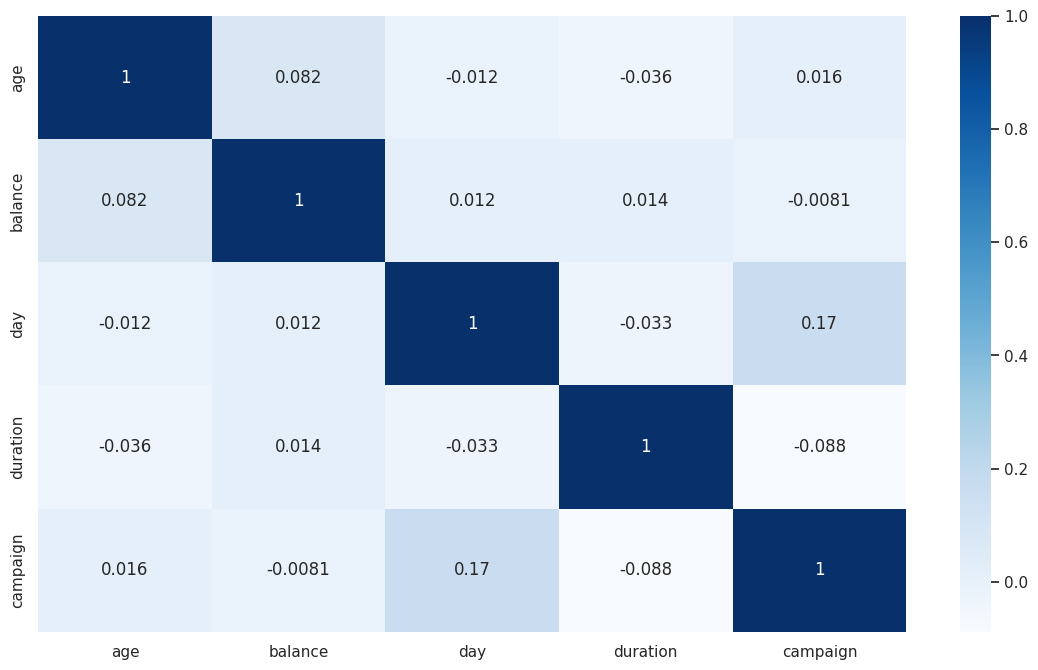

In [86]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

It looks there is no correlation between the features.

Checking for missing data

In [87]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

No Missing Data

In [88]:
data.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

Cleaning

Removing outliers by using IQR(interquartile range) of the numerical data.

In [89]:
numerical_col = data[['age', 'balance', 'duration', 'campaign']]
Q1 = numerical_col.quantile(0.25)
Q3 = numerical_col.quantile(0.75)
IQR = Q3 - Q1
print('min:\n', (Q1 - 1.5 * IQR))
print('max: \n', (Q3 + 1.5 * IQR))



min:
 age           10.5
balance    -1843.5
duration    -219.5
campaign      -2.0
dtype: float64
max: 
 age           70.5
balance     3216.5
duration     632.5
campaign       6.0
dtype: float64


As you can see the minimum shows what should be the mimimum in the dataset no value should be lower than that. Similiarly maximum shows no value should be maximum than the given value.

There are many methods to remove the outliers one of which is simply removing the outlier so we are going with it.

In [91]:
data.drop(data.loc[(data['age'] > 70) ].index, inplace=True)
data.drop(data.loc[(data['balance'] > 3216) | (data['balance'] < -1843)].index, inplace=True)
data.drop(data.loc[data['duration'] > 632 ].index, inplace=True)
data.drop(data.loc[data['campaign'] > 6 ].index, inplace=True)
data.shape

(30518, 14)

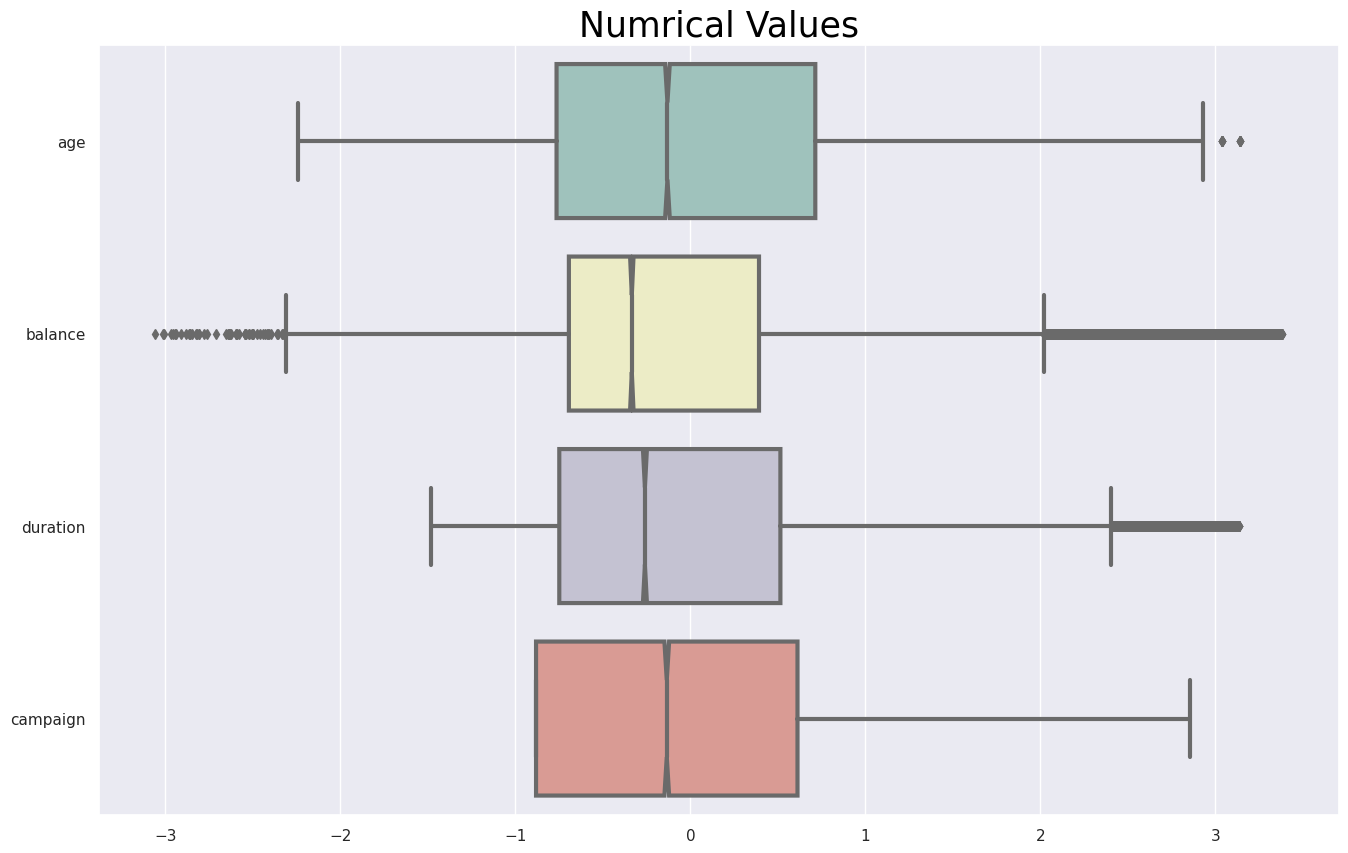

In [92]:
numerical_col = ['age', 'balance', 'duration', 'campaign']
scaler= StandardScaler()
data[numerical_col]=scaler.fit_transform(data[numerical_col])
fig,ax=plt.subplots(figsize=(16,10))

sns.boxplot(data=data[numerical_col], orient='h', fliersize=5, 
                 palette="Set3", linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.title('Numrical Values', fontsize = 25,color='black');


The outliers are reduced but the data is also been reduced to 30518 from 40000. Also we can see the balance and duration need more cleaning but using the process we may loose more data but we can use other methods.

Converting categorical data into numerical data for better learning process.

In [148]:

categorical_col=["job","marital","education","default","housing","loan","contact","month"]
for col in categorical_col:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])



binarizer = LabelBinarizer()
data['y']= binarizer.fit_transform(data['y'])


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30518 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        30518 non-null  float64
 1   job        30518 non-null  int64  
 2   marital    30518 non-null  int64  
 3   education  30518 non-null  int64  
 4   default    30518 non-null  int64  
 5   balance    30518 non-null  float64
 6   housing    30518 non-null  int64  
 7   loan       30518 non-null  int64  
 8   contact    30518 non-null  int64  
 9   day        30518 non-null  int64  
 10  month      30518 non-null  int64  
 11  duration   30518 non-null  float64
 12  campaign   30518 non-null  float64
 13  y          30518 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 3.5 MB


In [95]:
X = data.drop('y', axis=1)
y = data['y']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [96]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24414, 13) (24414,)
(6104, 13) (6104,)


Using oversampling since the data is unbalanced

In [97]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=42)
X_train_oversampled,y_train_oversampled=oversampler.fit_resample(X_train, y_train)

**Machine Learning**

Logistic Regression

Logistic Regression with non oversampled data

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)

lg=logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)



In [115]:
scores= cross_val_score(lg, X_train, y_train, cv=5, scoring="accuracy")
average_accuracy=scores.mean()
print(f"Accuracy(without oversampling):{average_accuracy:.4f}")



Accuracy(without oversampling):0.9623


In [113]:

lgo=logmodel.fit(X_train_oversampled, y_train_oversampled)

scores= cross_val_score(lgo, X_train_oversampled, y_train_oversampled, cv=5, scoring="accuracy")
average_accuracy=scores.mean()
print(f"Accuracy(with oversampling):{average_accuracy:.4f}")

Accuracy(with oversampling):0.8335


In [114]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5860
           1       0.29      0.02      0.04       244

    accuracy                           0.96      6104
   macro avg       0.63      0.51      0.51      6104
weighted avg       0.93      0.96      0.94      6104



Here the the model that is trained without oversampled data gives more accuracy.

Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtree = DecisionTreeClassifier()
dt=dtree.fit(X_train, y_train)


In [102]:

scores= cross_val_score(dt, X_train, y_train, cv=5, scoring="accuracy")
average_accuracy=scores.mean()
print(f"Accuracy(without oversampling):{average_accuracy:.4f}")



Accuracy(without oversampling):0.9470


In [103]:
dtreeO = dtree.fit(X_train_oversampled, y_train_oversampled)
cores= cross_val_score(dtreeO,X_train_oversampled, y_train_oversampled, cv=5, scoring="accuracy")
average_accuracy=scores.mean()
print(f"Accuracy(with oversampling):{average_accuracy:.4f}")

Accuracy(with oversampling):0.9470


As you can see while training with without oversampled data the accuracy is same. So the decision tree model itself is doing oversampling.

Feature Importance

In [105]:
importance = dtree.feature_importances_
feature_names=X.columns
feature_imp=pd.DataFrame({"Feature": feature_names, "Importance":importance})
feature_imp=feature_imp.sort_values(by="Importance",ascending=False)
print("Feature Importance:")
print(feature_imp)

Feature Importance:
      Feature  Importance
11   duration    0.316804
12   campaign    0.114684
10      month    0.114147
8     contact    0.094604
6     housing    0.075060
9         day    0.074486
5     balance    0.055044
0         age    0.053683
7        loan    0.043688
1         job    0.031846
2     marital    0.012964
3   education    0.012756
4     default    0.000234


Here the feature importane is shown in a decreasing order where duration and month is the most important.

Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rg=model.fit(X_train,y_train)
scores= cross_val_score(rg, X_train, y_train, cv=5, scoring="accuracy")
average_accuracy=scores.mean()
print(f"Accuracy(without oversampling):{average_accuracy:.4f}")

Accuracy(without oversampling):0.9649


In [107]:

modelo=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier()

In [116]:
scores= cross_val_score(modelo, X_train_oversampled, y_train_oversampled, cv=5, scoring="accuracy")
average_accuracy=scores.mean()
print(f"Accuracy(with oversampling):{average_accuracy:.4f}")

Accuracy(with oversampling):0.9774


Here model that is trained by oversampled data gives more accuracy compared to the other one

Feature Importance

In [118]:
importance = model.feature_importances_
feature_names=X.columns
feature_imp=pd.DataFrame({"Feature": feature_names, "Importance":importance})
feature_imp=feature_imp.sort_values(by="Importance",ascending=False)
print("Feature Importance:")
print(feature_imp)

Feature Importance:
      Feature  Importance
11   duration    0.267188
12   campaign    0.123496
10      month    0.104528
8     contact    0.093338
9         day    0.077957
6     housing    0.077053
5     balance    0.072342
0         age    0.063816
7        loan    0.043892
1         job    0.037672
3   education    0.019828
2     marital    0.017878
4     default    0.001011


Here we can see the duration, balance, month are the most important features.

XGBoost

In [121]:
from xgboost import XGBClassifier
model = XGBClassifier()
# fit the model

xg= model.fit(X_train, y_train)
scores= cross_val_score(xg, X_train, y_train, cv=5, scoring="accuracy")
average_accuracy=scores.mean()
print(f"Accuracy(without oversampling):{average_accuracy:.4f}")

Accuracy(without oversampling):0.9660


In [122]:


scores= cross_val_score(model, X_train_oversampled, y_train_oversampled, cv=5, scoring="accuracy")
average_accuracy=scores.mean()
print(f"Accuracy(with oversampling):{average_accuracy:.4f}")
xgo= model.fit(X_train_oversampled,y_train_oversampled)
test_accuracy=xgo.score(X_test,y_test)
print(test_accuracy)


Accuracy(with oversampling):0.9766
0.9577326343381389


Here the model without oversampled data is trained more compared to other

LGBM

In [123]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
params={ 'objective':'binary','metric':'binary_logloss','num_leaves':31,'learning_rate':0.05,'feature_fraction':0.9}
lgbm=lgb.train(params, train_data,num_boost_round=100)

y_pred=lgbm.predict(X_test)

print(y_pred)

[LightGBM] [Info] Number of positive: 905, number of negative: 23509
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 24414, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.037069 -> initscore=-3.257204
[LightGBM] [Info] Start training from score -3.257204
[0.0060607  0.00116029 0.00140087 ... 0.01729125 0.00754543 0.0157348 ]


In [124]:
y_pred=np.round(y_pred)
print('Accuracy =' , metrics.accuracy_score(y_pred, y_test))
cv_result=lgb.cv(params,train_data,num_boost_round=100,nfold=5,stratified=True, shuffle=True, metrics='binary_error',early_stopping_rounds=10,verbose_eval=False)
average_accuracy=1-cv_result['binary_error-mean'][-1]
print(f"Accuracy:{average_accuracy:.4f}")

Accuracy = 0.9637942332896461
[LightGBM] [Info] Number of positive: 724, number of negative: 18807
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 19531, number of used features: 13
[LightGBM] [Info] Number of positive: 724, number of negative: 18807
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 19531, number of used features: 13
[LightGBM] [Info] Number of positive: 724, number of negative: 18807
[LightGBM] [Warning] Auto-choosing row-wise multi-thr

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


catboost

In [125]:
!pip install catboost
from catboost import CatBoostClassifier,cv, Pool
ct= CatBoostClassifier(iterations=100,learning_rate=0.05,depth=6,loss_function='Logloss')
ct.fit(X_train, y_train, verbose=False)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.5 MB/s eta 0:00:00


In [126]:
cv_score= cross_val_score(ct, X, y, cv=5, scoring='accuracy')

average_accuracy=cv_score.mean()
print(f"Accuracy:{average_accuracy:.4f}")

0:	learn: 0.6516422	total: 3.09ms	remaining: 306ms
1:	learn: 0.6141910	total: 6.14ms	remaining: 301ms
2:	learn: 0.5796948	total: 8.7ms	remaining: 281ms
3:	learn: 0.5484390	total: 11.6ms	remaining: 278ms
4:	learn: 0.5198110	total: 13.4ms	remaining: 254ms
5:	learn: 0.4936298	total: 16.5ms	remaining: 258ms
6:	learn: 0.4697295	total: 19.3ms	remaining: 257ms
7:	learn: 0.4472454	total: 22.3ms	remaining: 256ms
8:	learn: 0.4267311	total: 25ms	remaining: 253ms
9:	learn: 0.4080673	total: 27.8ms	remaining: 250ms
10:	learn: 0.3904963	total: 30.2ms	remaining: 245ms
11:	learn: 0.3738742	total: 33.1ms	remaining: 243ms
12:	learn: 0.3588000	total: 36.3ms	remaining: 243ms
13:	learn: 0.3445607	total: 39.3ms	remaining: 241ms
14:	learn: 0.3314079	total: 42ms	remaining: 238ms
15:	learn: 0.3191058	total: 44.7ms	remaining: 235ms
16:	learn: 0.3074194	total: 46.9ms	remaining: 229ms
17:	learn: 0.2965921	total: 49.6ms	remaining: 226ms
18:	learn: 0.2860136	total: 52.7ms	remaining: 225ms
19:	learn: 0.2762680	total:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

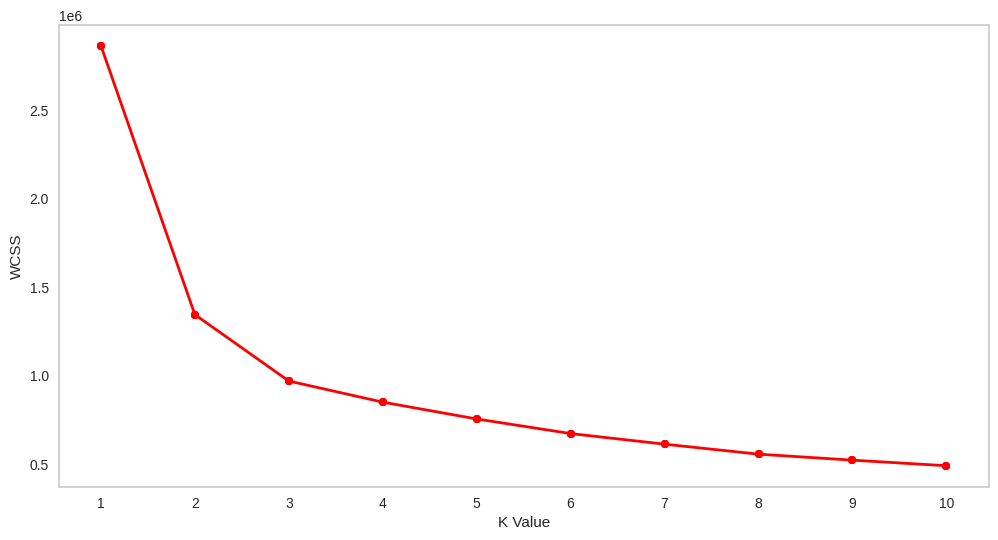

In [131]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

From the elbow method we can see that 3 clusters are needed.

In [155]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
data['segment']=kmeans.labels_
segment_stats=data.groupby('segment').mean()

segment_labels=kmeans.labels_
segment_data=data.copy()
segment_data["Segment"]=segment_labels
segment_counts=segment_data["Segment"].value_counts().sort_index()
print("Customer Segmentation:")
print(segment_counts)

print(segment_stats)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Customer Segmentation:
0    35935
1     3777
2      288
Name: Segment, dtype: int64
               age       job   marital  education   default       balance  \
segment                                                                     
0        40.310756  4.244525  1.152971   1.187700  0.022429    588.321553   
1        42.512047  4.453535  1.164151   1.288059  0.000530   6080.209161   
2        43.920139  4.493056  1.163194   1.572917  0.003472  23836.170139   

          housing      loan   contact        day     month    duration  \
segment                                                                  
0        0.606623  0.182218  0.699430  15.965827  5.476861  253.482677   
1        0.557321  0.096373  0.670109  16.462536  5.785015  268.145353   
2        0.440972  0.062500  0.645833  16.590278  5.972222  247.524306   

         campaign         y  
segment                      
0        2.888577  0.069347  
1        2.816786  0.101138  
2        2.940972  0.076389  


As you can see there are three segments which we took from the elbow method. Each segments are given above. from the y value we should concentrate mainly on segment 1 which gives 0.1 as their mean.

**Conclusion**

With the given data various models are trained and the best model is random forest which is trained by oversampled data of 97.74 percentage accuracy. Also xgboost with oversampled data also gives nearby good accuracy of 97.66 percentage. This is evaluated with 5 fold cross validation method. Oversampling is used because the data is unbalanced. The best features are duration, campaign and month. Also 3 segments have been made where the segment 1 is the customer which must be concentrated.